In [1]:
from pymongo import MongoClient
from bson.son import SON
from textblob import TextBlob
from dateutil import parser
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

client = MongoClient("52.25.140.201",27017)
db = client['ProjectCorruption']
coll_parsed = db['Parsed_Articles']

In [2]:
from_year = '01/01/2014'
to_year = '12/31/2014'
from_year_d = parser.parse(from_year)
to_year_d = parser.parse(to_year)

In [3]:
list_df = []
total_recs = coll_parsed.find({"date": {"$gte":from_year_d}, "date": {"$lte":to_year_d}}).count()
proc_recs = 0

for each in coll_parsed.find({"date": {"$gte":from_year_d}, "date": {"$lte":to_year_d}}):
    proc_recs +=1
    body_split = each['body'].split(".")
    list_df += body_split
    print "Processed: "+str(proc_recs)+" of "+str(total_recs)

Processed: 1 of 8402
Processed: 2 of 8402
Processed: 3 of 8402
Processed: 4 of 8402
Processed: 5 of 8402
Processed: 6 of 8402
Processed: 7 of 8402
Processed: 8 of 8402
Processed: 9 of 8402
Processed: 10 of 8402
Processed: 11 of 8402
Processed: 12 of 8402
Processed: 13 of 8402
Processed: 14 of 8402
Processed: 15 of 8402
Processed: 16 of 8402
Processed: 17 of 8402
Processed: 18 of 8402
Processed: 19 of 8402
Processed: 20 of 8402
Processed: 21 of 8402
Processed: 22 of 8402
Processed: 23 of 8402
Processed: 24 of 8402
Processed: 25 of 8402
Processed: 26 of 8402
Processed: 27 of 8402
Processed: 28 of 8402
Processed: 29 of 8402
Processed: 30 of 8402
Processed: 31 of 8402
Processed: 32 of 8402
Processed: 33 of 8402
Processed: 34 of 8402
Processed: 35 of 8402
Processed: 36 of 8402
Processed: 37 of 8402
Processed: 38 of 8402
Processed: 39 of 8402
Processed: 40 of 8402
Processed: 41 of 8402
Processed: 42 of 8402
Processed: 43 of 8402
Processed: 44 of 8402
Processed: 45 of 8402
Processed: 46 of 84

In [4]:
print len(list_df)

298607


In [ ]:
print list_df

In [5]:
print list_df[2].split(" ")

[u'Havelange,', u'de', u'96', u'a\xf1os,', u'fue', u'el', u'mandam\xe1s', u'de', u'la', u'FIFA', u'entre', u'1974', u'y', u'1998']


In [6]:
from nltk.corpus import stopwords

stop = stopwords.words('spanish')
stop += ['.', ',', '(', ')', "'", '"',';']

In [7]:
corpus = []

for index in range(len(list_df)):
    aux = list_df[index].split(" ")
    for each in aux:
        if each not in stop:
            corpus.append(aux)

In [ ]:
print corpus

In [9]:
import gensim

model = gensim.models.Word2Vec(corpus,min_count=3,workers=5)
print model

Word2Vec(vocab=296894, size=100, alpha=0.025)


In [19]:
model.most_similar(positive=['Kirchner'],topn=20)

[(u'Fern\xe1ndez', 0.7289087176322937),
 (u'Cristina', 0.6978862285614014),
 (u'Kirchner,', 0.6975911855697632),
 (u'N\xe9stor', 0.6679303646087646),
 (u'\xa0Foto:\xa0@doctorsergio\xa0La', 0.6458748579025269),
 (u'meses?\nA', 0.6429792642593384),
 (u'-hijos', 0.6137482523918152),
 (u'de\xa0Kirchner,', 0.6103055477142334),
 (u'advertir\xeda', 0.5978500247001648),
 (u'(N\xe9stor,', 0.5787473320960999),
 (u'presionarlo,', 0.5763331651687622),
 (u'embarr\xe1ndose', 0.5663681626319885),
 (u'Hotesur,\xa0de', 0.5605217814445496),
 (u'cinematogr\xe1fica:', 0.5584543943405151),
 (u'com/nkrEFlRlCK&-', 0.5468655824661255),
 (u'chapucer\xeda?La', 0.5430783033370972),
 (u'endilgaba', 0.5399684906005859),
 (u'presidenta', 0.5368199348449707),
 (u'yuyito\u201d,', 0.5364935398101807),
 (u'M\xe1ximo', 0.5353981852531433)]

In [22]:
model.similarity('Kirchner','Grondona')

0.044879914780904348

In [15]:
model.similarity('Grondona','FIFA')

0.17348420252328281

In [29]:
print list_people[1]
print list_people[2]

model.similarity(list_people[1],list_people[2])

Maduro
Leoz


-0.08086011268244786

In [35]:
list_people = [u'Kirchner',u'Maduro',u'Leoz',u'senador',u'Boudou',u'Lijo',u'FIFA',\
               u'Blatter', u'Venezuela', u'Grondona', u'Oyarbide',u'Vido',u'Menem',u'diputado',\
               u'AFA',u'Lula',u'Havelange',u'Dilma',u'Macri',u'Vandenbroele',\
               u'Pontaquarto',u'Clarin',u'Baez',u'Fernandez']

print list_people

[u'Kirchner', u'Maduro', u'Leoz', u'senador', u'Boudou', u'Lijo', u'FIFA', u'Blatter', u'Venezuela', u'Grondona', u'Oyarbide', u'Vido', u'Menem', u'diputado', u'AFA', u'Lula', u'Havelange', u'Dilma', u'Macri', u'Vandenbroele', u'Pontaquarto', u'Clarin', u'Baez', u'Fernandez']


In [42]:
w2v_scores = pd.DataFrame(0.0,columns=list_people, index=list_people)

print w2v_scores

              Kirchner  Maduro  Leoz  Boudou  Lijo  FIFA  Blatter  Venezuela  \
Kirchner             0       0     0       0     0     0        0          0   
Maduro               0       0     0       0     0     0        0          0   
Leoz                 0       0     0       0     0     0        0          0   
Boudou               0       0     0       0     0     0        0          0   
Lijo                 0       0     0       0     0     0        0          0   
FIFA                 0       0     0       0     0     0        0          0   
Blatter              0       0     0       0     0     0        0          0   
Venezuela            0       0     0       0     0     0        0          0   
Grondona             0       0     0       0     0     0        0          0   
Oyarbide             0       0     0       0     0     0        0          0   
Vido                 0       0     0       0     0     0        0          0   
Menem                0       0     0    

In [39]:
list_people = [u'Kirchner',u'Maduro',u'Leoz',u'Boudou',u'Lijo',u'FIFA',\
               u'Blatter', u'Venezuela', u'Grondona', u'Oyarbide',u'Vido',u'Menem',\
               u'AFA',u'Lula',u'Havelange',u'Dilma',u'Macri',u'Vandenbroele',\
               u'Pontaquarto',u'Clarin',u'Baez']

print list_people

[u'Kirchner', u'Maduro', u'Leoz', u'Boudou', u'Lijo', u'FIFA', u'Blatter', u'Venezuela', u'Grondona', u'Oyarbide', u'Vido', u'Menem', u'AFA', u'Lula', u'Havelange', u'Dilma', u'Macri', u'Vandenbroele', u'Pontaquarto', u'Clarin', u'Baez']


In [43]:
for each_1 in list_people:
    for each_2 in list_people:
        w2v_scores[each_1][each_2] = model.similarity(each_1,each_2)

In [44]:
print w2v_scores

              Kirchner    Maduro      Leoz    Boudou      Lijo      FIFA  \
Kirchner      1.000000  0.202105 -0.031229  0.140393  0.026709  0.135445   
Maduro        0.202105  1.000000 -0.080860  0.077976  0.150591  0.073831   
Leoz         -0.031229 -0.080860  1.000000 -0.027811 -0.076381  0.042916   
Boudou        0.140393  0.077976 -0.027811  1.000000  0.278949  0.032085   
Lijo          0.026709  0.150591 -0.076381  0.278949  1.000000 -0.029229   
FIFA          0.135445  0.073831  0.042916  0.032085 -0.029229  1.000000   
Blatter       0.067067  0.118744  0.219281  0.101636 -0.075585  0.341813   
Venezuela    -0.024621  0.169906 -0.065902  0.032976 -0.092859  0.040427   
Grondona      0.044880  0.096904  0.120070 -0.063953 -0.031655  0.173484   
Oyarbide      0.111859  0.021457 -0.012573  0.255154  0.412104  0.064591   
Vido          0.219828 -0.092499  0.011059  0.232289  0.063427 -0.092862   
Menem         0.270799  0.230346 -0.174527  0.266582  0.121090 -0.025196   
AFA         

([<matplotlib.axis.YTick at 0x14258cfd0>,
 <a list of 21 Text yticklabel objects>)

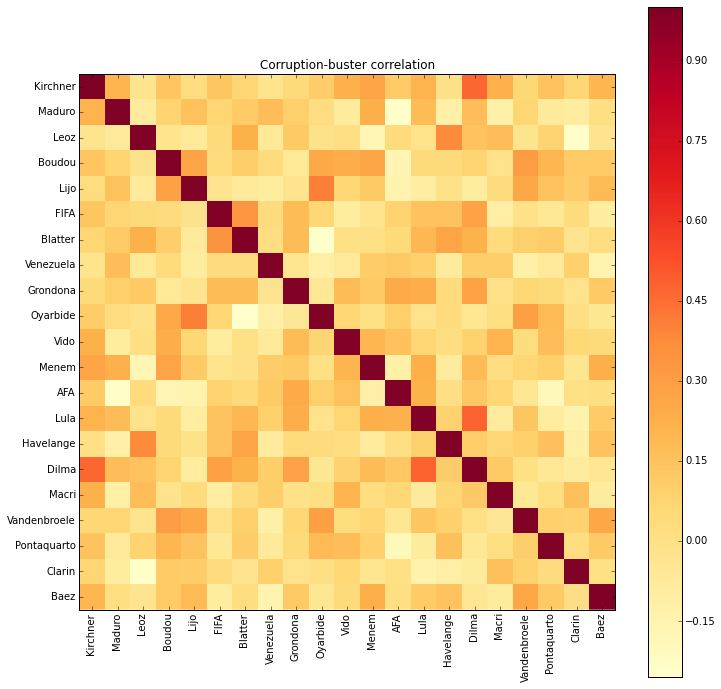

In [46]:
plt.figure(figsize=(12,12))
plt.imshow(w2v_scores,cmap='YlOrRd',interpolation='none')
plt.colorbar()
plt.title("Corruption-buster correlation")
plt.xticks(range(len(w2v_scores)), w2v_scores.columns, rotation=90)
plt.yticks(range(len(w2v_scores)), w2v_scores.columns)